<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/statics/%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 공공자전거 이용정보 데이터

출처 : https://data.seoul.go.kr/dataList/OA-15246/F/1/datasetView.do

22년 12월의 서울시 공공자전거 이용정보 데이터를 가져와 기술통계를 실습해 보겠습니다.

## 필요한 라이브러리 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=Warning)

In [ ]:
font_name = './drive/MyDrive/data/malgun.ttf'

from matplotlib import font_manager
fontprop = font_manager.FontProperties(fname=font_name, size=20)

## 데이터 확인

In [ ]:
df = pd.read_csv('./drive/MyDrive/data/bike_2212.csv', encoding='cp949')
df.columns = ['day', 'number', 'spot', 'code', 'sex', 'age', 'count', 'momentum', 'carbon', 'distance', 'minute']
df

,day,number,spot,code,sex,age,count,momentum,carbon,distance,minute
0,2022-12-01,729,729. 서부식자재마트 건너편,정기권,NaN,~10대,1,58.56,0.44,1895.75,10
1,2022-12-01,735,735. 영도초등학교,정기권,NaN,~10대,3,47.52,0.51,2190.00,12
2,2022-12-01,739,739. 신월사거리,정기권,NaN,~10대,1,13.50,0.14,620.00,6
3,2022-12-01,741,741. 화곡로 입구 교차로,정기권,NaN,~10대,1,54.67,0.58,2510.00,19
4,2022-12-01,746,746. 목동2단지 상가,정기권,NaN,~10대,3,64.97,0.73,3170.97,20
...,...,...,...,...,...,...,...,...,...,...,...
1074741,2022-12-31,3501,3501. 광진구청 앞,정기권,M,기타,1,52.78,0.45,1960.00,62
1074742,2022-12-31,3502,3502. 중곡역 1번출구,정기권,M,기타,1,96.31,0.71,3040.00,23
1074743,2022-12-31,502,502. 뚝섬유원지역 1번출구 앞,정기권,M,기타,1,34.49,0.31,1340.00,8
1074744,2022-12-31,426,426. 서울신용보증재단,정기권,M,기타,1,42.47,0.38,1650.00,28


총 11개의 컬럼과 1,074,746개의 열이 있습니다.

.info() 메서드로 데이터의 정보를 확인할 수 있습니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074746 entries, 0 to 1074745
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   day       1074746 non-null  object 
 1   number    1074746 non-null  int64  
 2   spot      1074746 non-null  object 
 3   code      1074746 non-null  object 
 4   sex       735257 non-null   object 
 5   age       1074746 non-null  object 
 6   count     1074746 non-null  int64  
 7   momentum  1074746 non-null  object 
 8   carbon    1074746 non-null  object 
 9   distance  1074746 non-null  float64
 10  minute    1074746 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 90.2+ MB


In [ ]:
df.isnull().sum()

day              0
number           0
spot             0
code             0
sex         339489
age              0
count            0
momentum         0
carbon           0
distance         0
minute           0
dtype: int64

성별 컬럼에 null이 조금 있고, 중간중간 int, float 정수형 실수형 데이터가 있는것을 확인할 수 있습니다.

그런데 이상하네요.
운동량, 탄소량은 수치형이어야하는데, object라고 나옵니다.
확인해 보겠습니다.

In [ ]:
import re

pattern = r"[^0-9.]"

for i in df.momentum:
    result = re.search(pattern, i)
    if result:
        print(f"Non-matching character found in '운동량': {i}")
        break

Non-matching character found in '운동량': \N


In [ ]:
df[df.momentum =='\\N']

,day,number,spot,code,sex,age,count,momentum,carbon,distance,minute
388,2022-12-01,1024,1024. 강동구청 앞,정기권,NaN,20대,1,\N,\N,0.0,50
1053,2022-12-01,2523,2523.뉴코아 킴스클럽 앞,정기권,NaN,20대,1,\N,\N,0.0,3
1676,2022-12-01,617,617. 청솔우성아파트 앞,정기권,NaN,20대,1,\N,\N,0.0,262
1680,2022-12-01,4512,4512. 목동13_14단지 사거리,정기권,NaN,20대,1,\N,\N,0.0,60
3503,2022-12-01,4705,4705. 웰니스센터(민방위교육장 앞),정기권,NaN,30대,1,\N,\N,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...
1072856,2022-12-31,175,175. 홍연2교옆,정기권,M,40대,1,\N,\N,0.0,15
1072907,2022-12-31,4761,4761. 중부경찰서앞사거리 건너편,정기권,M,40대,1,\N,\N,0.0,115
1073668,2022-12-31,605,605. 신설동역8번출구,정기권,M,50대,1,\N,\N,0.0,100
1073670,2022-12-31,606,606. 휘경공고앞,정기권,M,50대,1,\N,\N,0.0,115


확인해 보니 운동량과 탄소량에 '\N'이 있는 열의 이동거리가 모두 0.0으로 나왔습니다.

아마 이용시간은 있지만 이동거리가 0인건 오류인것같습니다.

과감하게 삭제시키겠습니다.

In [ ]:
df = df[df['momentum'] != '\\N'].reset_index(drop=True)
df

,day,number,spot,code,sex,age,count,momentum,carbon,distance,minute
0,2022-12-01,729,729. 서부식자재마트 건너편,정기권,NaN,~10대,1,58.56,0.44,1895.75,10
1,2022-12-01,735,735. 영도초등학교,정기권,NaN,~10대,3,47.52,0.51,2190.00,12
2,2022-12-01,739,739. 신월사거리,정기권,NaN,~10대,1,13.50,0.14,620.00,6
3,2022-12-01,741,741. 화곡로 입구 교차로,정기권,NaN,~10대,1,54.67,0.58,2510.00,19
4,2022-12-01,746,746. 목동2단지 상가,정기권,NaN,~10대,3,64.97,0.73,3170.97,20
...,...,...,...,...,...,...,...,...,...,...,...
1071858,2022-12-31,3501,3501. 광진구청 앞,정기권,M,기타,1,52.78,0.45,1960.00,62
1071859,2022-12-31,3502,3502. 중곡역 1번출구,정기권,M,기타,1,96.31,0.71,3040.00,23
1071860,2022-12-31,502,502. 뚝섬유원지역 1번출구 앞,정기권,M,기타,1,34.49,0.31,1340.00,8
1071861,2022-12-31,426,426. 서울신용보증재단,정기권,M,기타,1,42.47,0.38,1650.00,28


이제 다시 info()메서드로 확인해 보겠습니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071863 entries, 0 to 1071862
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   day       1071863 non-null  object 
 1   number    1071863 non-null  int64  
 2   spot      1071863 non-null  object 
 3   code      1071863 non-null  object 
 4   sex       733304 non-null   object 
 5   age       1071863 non-null  object 
 6   count     1071863 non-null  int64  
 7   momentum  1071863 non-null  object 
 8   carbon    1071863 non-null  object 
 9   distance  1071863 non-null  float64
 10  minute    1071863 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 90.0+ MB


아직도 object라고 돼있네요. astype으로 float으로 데이터를 변환시키겠습니다.

In [ ]:
df['momentum'] = df['momentum'].astype(float)
df['carbon'] = df['carbon'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071863 entries, 0 to 1071862
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   day       1071863 non-null  object 
 1   number    1071863 non-null  int64  
 2   spot      1071863 non-null  object 
 3   code      1071863 non-null  object 
 4   sex       733304 non-null   object 
 5   age       1071863 non-null  object 
 6   count     1071863 non-null  int64  
 7   momentum  1071863 non-null  float64
 8   carbon    1071863 non-null  float64
 9   distance  1071863 non-null  float64
 10  minute    1071863 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 90.0+ MB


### 수치형 데이터 통계

이제 전처리는 잘 된거같습니다.

이제 통계량을 한번 살펴보겠습니다.

메서드는 describe() 입니다.

In [ ]:
df.describe()

,number,count,momentum,carbon,distance,minute
count,1.071863e+06,1.071863e+06,1.071863e+06,1.071863e+06,1.071863e+06,1.071863e+06
mean,2.111711e+03,1.636204e+00,8.261790e+01,7.113090e-01,3.066007e+03,2.876533e+01
std,1.518663e+03,1.421872e+00,9.875292e+01,8.230273e-01,3.547514e+03,3.716819e+01
min,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.950000e+02,1.000000e+00,2.644000e+01,2.400000e-01,1.016380e+03,7.000000e+00
50%,1.703000e+03,1.000000e+00,5.045000e+01,4.400000e-01,1.910000e+03,1.600000e+01
75%,3.517000e+03,2.000000e+00,9.991000e+01,8.700000e-01,3.730000e+03,3.500000e+01
max,9.980000e+03,5.200000e+01,2.854800e+03,2.904000e+01,1.251741e+05,1.454000e+03


describe 메서드를 사용하면 수치형 데이터의 평균, 표준편차, 최솟값, 25%, 50%, 75%, 최댓값을 확인할 수 있습니다.

12월 서울시 공공 자전거의 평균 이동거리는 3,066m로 확인할 수 있습니다.

12월 서울시 공공 자전거의 평균 이용시간은 28.7분으로 확인할 수 있습니다.

### 범주형 데이터 통계

범주형 데이터도 확인해 볼 수 있습니다.

여기서 확인할 수 있는 범주형 데이터는 '대여구분코드',	'성별',	'연령대' 가 되겠네요.

먼저 대여구분코드입니다.

In [ ]:
df['code'].unique()

array(['정기권', '일일권', '일일권(비회원)', '단체권'], dtype=object)

정기권, 일일권, 일일권(비회원), 단체권이있네요.

In [ ]:
df['code'].value_counts()

정기권         920460
일일권         142791
일일권(비회원)      5709
단체권           2903
Name: code, dtype: int64

대여구분코드를 시각화해보겠습니다.

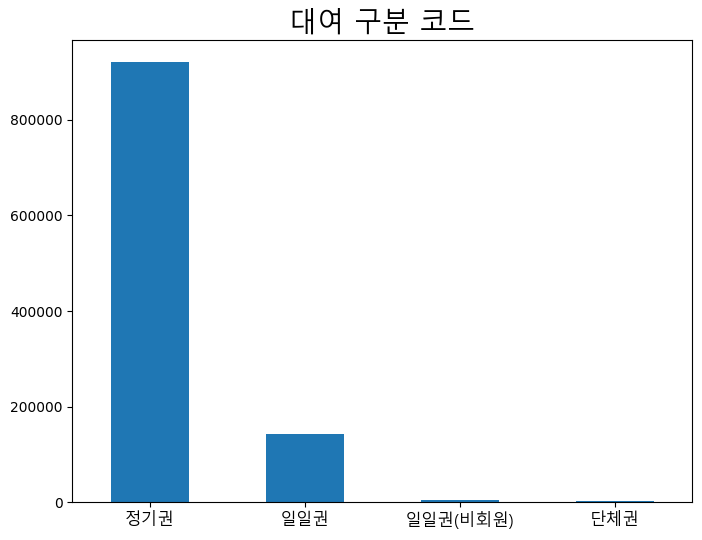

In [ ]:
plt.figure(figsize=(8, 6))
df['code'].value_counts().plot(kind='bar')

plt.xticks(rotation=0, fontproperties=fontprop, fontsize=12)
plt.title('대여 구분 코드', fontproperties=fontprop)
plt.show()

다음은 성별입니다.

In [ ]:
df['sex'].unique()

array([nan, 'F', 'f', 'M', 'm'], dtype=object)

In [ ]:
df['sex'].value_counts()

M    463374
F    269709
m       189
f        32
Name: sex, dtype: int64

nan을 문자열 'Unkown'으로 바꾸고

m, f를 대문자로 바꿔주겠습니다.

In [ ]:
df['sex'] = df['sex'].fillna('Unkown')
df['sex'] = df['sex'].str.upper()

In [ ]:
df['sex'].value_counts()

M         463563
UNKOWN    338559
F         269741
Name: sex, dtype: int64

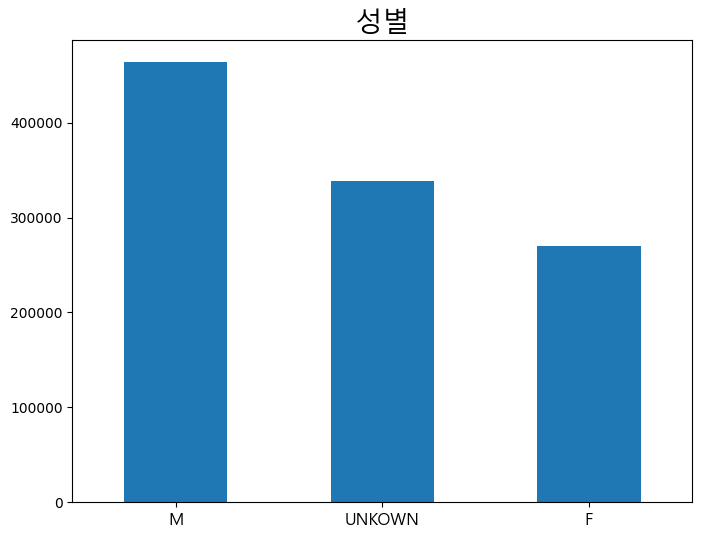

In [ ]:
plt.figure(figsize=(8, 6))
df['sex'].value_counts().plot(kind='bar')

plt.xticks(rotation=0, fontproperties=fontprop, fontsize=12)
plt.title('성별', fontproperties=fontprop)
plt.show()

마지막으로 연령대 입니다.

In [ ]:
df['age'].unique()

array(['~10대', '20대', '30대', '40대', '50대', '60대', '70대이상', '기타'],
      dtype=object)

In [ ]:
df['age'].value_counts()

20대      288147
30대      235459
40대      176424
50대      130827
기타       107095
~10대      76124
60대       49476
70대이상      8311
Name: age, dtype: int64

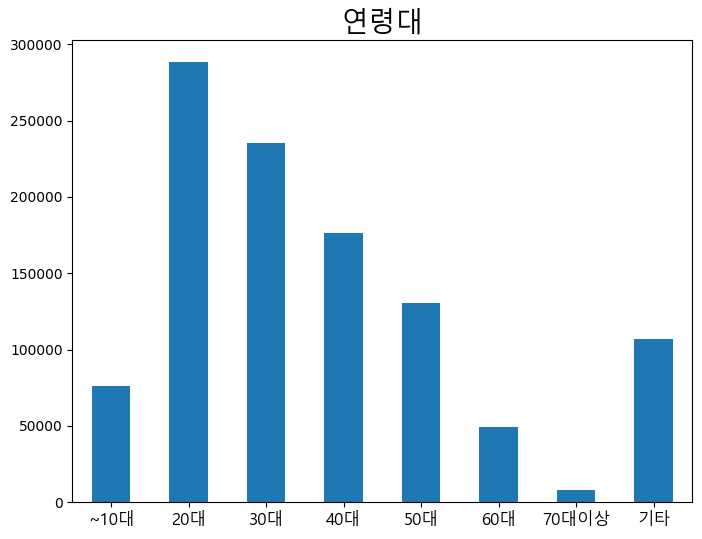

In [ ]:
plt.figure(figsize=(8, 6))
age_counts = df['age'].value_counts()

age_labels = df['age'].unique()
age_counts.loc[age_labels].plot(kind='bar')

plt.xticks(range(len(age_labels)), age_labels, rotation=0, fontproperties=fontprop, fontsize=12)
plt.title('연령대', fontproperties=fontprop)
plt.show()

## 이상값

수치형 데이터의 이상치가 있는지 확인하고 필요에따라 제거해보겠습니다.

In [ ]:
num_df = df[['momentum', 'carbon', 'distance', 'minute']]
num_df

,momentum,carbon,distance,minute
0,58.56,0.44,1895.75,10
1,47.52,0.51,2190.00,12
2,13.50,0.14,620.00,6
3,54.67,0.58,2510.00,19
4,64.97,0.73,3170.97,20
...,...,...,...,...
1071858,52.78,0.45,1960.00,62
1071859,96.31,0.71,3040.00,23
1071860,34.49,0.31,1340.00,8
1071861,42.47,0.38,1650.00,28


이상치를 모두 제거한 운동량의 box plot을 보겠습니다.

In [ ]:
def boxplot(c_name, korean):
    q1 = c_name.quantile(0.25)
    q3 = c_name.quantile(0.75)
    IQR = q3 - q1
    print("Q1 =",q1)
    print("Q3 =",q3)
    print("IQR =",IQR)
    print("="*20)
    print(f"{korean}의 Minimum \t:",q1 - 1.5*IQR)
    print(f"{korean}의 최솟값 \t:",c_name.min())
    print(f"{korean}의 1분위수(25%) :",c_name.quantile(0.25))
    print(f"{korean}의 2분위수(50%) :",c_name.quantile(0.5))
    print(f"{korean}의 중위수 \t:",c_name.median())
    print(f"{korean}의 3분위수(75%) :",c_name.quantile(0.75))
    print(f"{korean}의 최댓값 \t:",c_name.max())
    print(f"{korean}의 Maximun \t:",q3 + 1.5*IQR)
    plt.figure(figsize=(10, 6))
    plt.boxplot(c_name)
    plt.title(f'{korean} Box Plot', fontproperties=fontprop)
    plt.ylabel('Values')
    plt.xticks([1], [f'{korean}'], rotation=0, fontproperties=fontprop)
    plt.show()

Q1 = 26.44
Q3 = 99.91
IQR = 73.47
운동량의 Minimum 	: -83.765
운동량의 최솟값 	: 0.0
운동량의 1분위수(25%) : 26.44
운동량의 2분위수(50%) : 50.45
운동량의 중위수 	: 50.45
운동량의 3분위수(75%) : 99.91
운동량의 최댓값 	: 2854.8
운동량의 Maximun 	: 210.115


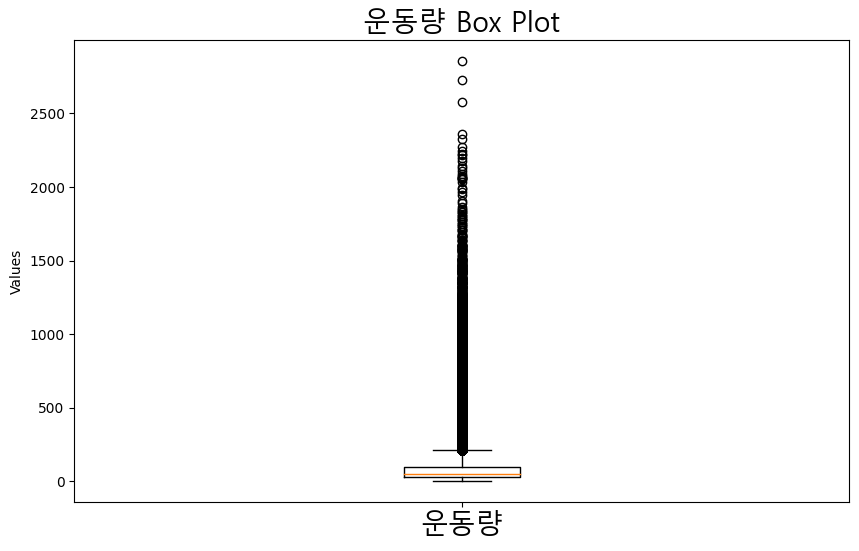

In [ ]:
boxplot(num_df.momentum, '운동량')

이상치를 제거 후 다시 box plot을 그려보겠습니다.

In [ ]:
momentum = num_df['momentum'][num_df['momentum'] <= num_df['momentum'].quantile(0.75)]

Q1 = 21.87
Q3 = 59.01
IQR = 37.14
운동량의 Minimum 	: -33.84
운동량의 최솟값 	: 0.0
운동량의 1분위수(25%) : 21.87
운동량의 2분위수(50%) : 36.94
운동량의 중위수 	: 36.94
운동량의 3분위수(75%) : 59.01
운동량의 최댓값 	: 99.91
운동량의 Maximun 	: 114.72


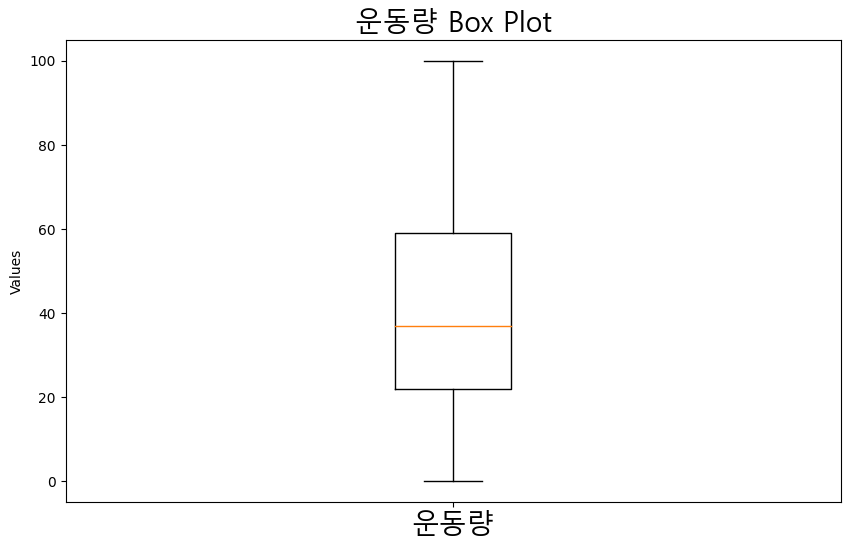

In [ ]:
boxplot(momentum, '운동량')

이상치를 제거한 운동량의 box plot으로 최솟값, 1분위수, 중위수, 3분위수, 최대값을 시각화해 볼 수 있습니다.

탄소량과 이동거리 이동시간도 해보겠습니다.

In [ ]:
carbon = num_df['carbon'][num_df['carbon'] <= num_df['carbon'].quantile(0.75)]

Q1 = 0.2
Q3 = 0.52
IQR = 0.32
탄소량의 Minimum 	: -0.27999999999999997
탄소량의 최솟값 	: 0.0
탄소량의 1분위수(25%) : 0.2
탄소량의 2분위수(50%) : 0.33
탄소량의 중위수 	: 0.33
탄소량의 3분위수(75%) : 0.52
탄소량의 최댓값 	: 0.87
탄소량의 Maximun 	: 1.0


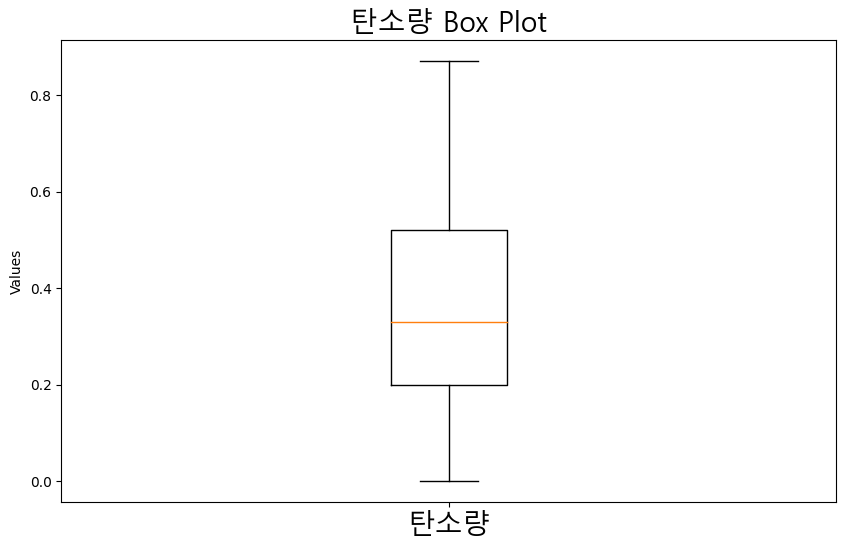

In [ ]:
boxplot(carbon, '탄소량')

In [ ]:
distance = num_df['distance'][num_df['distance'] <= num_df['distance'].quantile(0.75)]

Q1 = 843.52
Q3 = 2229.8
IQR = 1386.2800000000002
이동거리의 Minimum 	: -1235.9
이동거리의 최솟값 	: 0.0
이동거리의 1분위수(25%) : 843.52
이동거리의 2분위수(50%) : 1410.0
이동거리의 중위수 	: 1410.0
이동거리의 3분위수(75%) : 2229.8
이동거리의 최댓값 	: 3730.0
이동거리의 Maximun 	: 4309.22


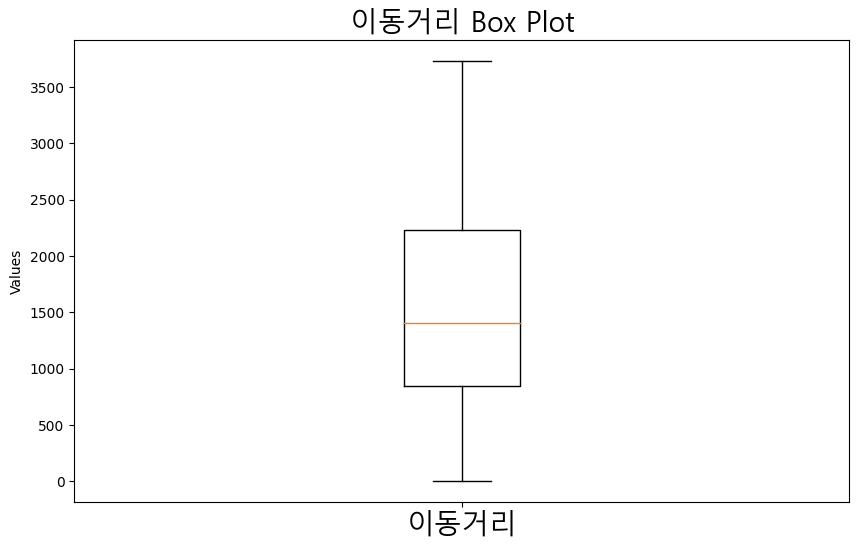

In [ ]:
boxplot(distance, '이동거리')

In [ ]:
minute = num_df['minute'][num_df['minute'] <= num_df['minute'].quantile(0.75)]

Q1 = 6.0
Q3 = 19.0
IQR = 13.0
이용시간의 Minimum 	: -13.5
이용시간의 최솟값 	: 0
이용시간의 1분위수(25%) : 6.0
이용시간의 2분위수(50%) : 11.0
이용시간의 중위수 	: 11.0
이용시간의 3분위수(75%) : 19.0
이용시간의 최댓값 	: 35
이용시간의 Maximun 	: 38.5


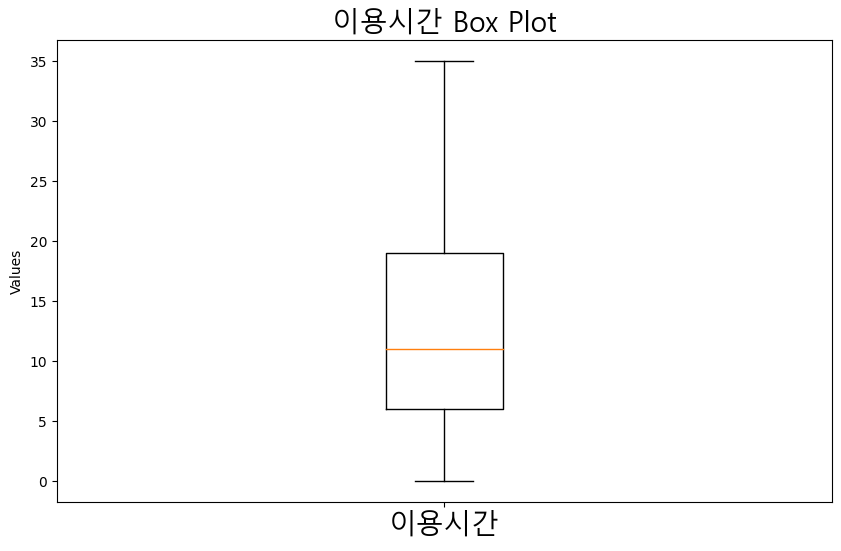

In [ ]:
boxplot(minute, '이용시간')

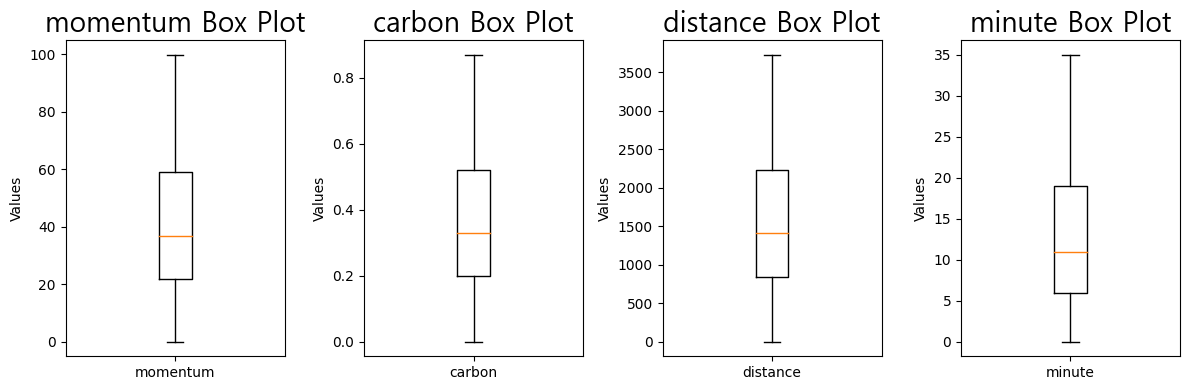

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

col = ['momentum', 'carbon', 'distance', 'minute']

for i, j in enumerate(col):
    tmp = num_df[num_df[j] <= num_df[j].quantile(0.75)]
    axs[i].boxplot(tmp[j])
    axs[i].set_title(f'{j} Box Plot', fontproperties=fontprop)
    axs[i].set_ylabel('Values')
    axs[i].set_xticks([1], [f'{j}'])
    axs[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
col = ['momentum', 'carbon', 'distance', 'minute']

for i in col:
    tmp[i] = num_df[i][num_df[i] <= num_df[i].quantile(0.75)]
tmp.describe()

,momentum,carbon,distance,minute
count,720307.000000,725254.000000,722618.000000,805461.000000
mean,39.870070,0.353249,1514.530851,13.102458
std,24.027134,0.208894,891.808242,8.727744
min,0.000000,0.000000,0.000000,0.000000
25%,20.980000,0.190000,810.970000,6.000000
50%,34.960000,0.310000,1336.235000,11.000000
75%,55.880000,0.490000,2111.297500,19.000000
max,99.910000,0.870000,3730.000000,35.000000


In [ ]:
df[df.distance == 3730]

,day,number,spot,code,sex,age,count,momentum,carbon,distance,minute
3138,2022-12-01,2422,2422.수서동 성당 맞은편,정기권,UNKOWN,30대,1,100.44,0.87,3730.0,20
6270,2022-12-01,1145,1145. 곰달래 문화복지센터 1-2,정기권,UNKOWN,50대,1,103.40,0.87,3730.0,13
6498,2022-12-01,1278,1278. 송파구청 교차로,정기권,UNKOWN,60대,1,82.72,0.87,3730.0,34
7788,2022-12-01,2102,2102. 봉림교 교통섬,정기권,F,~10대,2,89.79,0.86,3730.0,36
10857,2022-12-01,553,553. 중곡 성원아파트 앞,정기권,F,30대,1,112.26,0.87,3730.0,23
...,...,...,...,...,...,...,...,...,...,...,...
1065768,2022-12-31,5859,5859. 여의도 삼부아파트,정기권,UNKOWN,60대,1,94.53,0.87,3730.0,94
1066684,2022-12-31,5854,5854. 신한금융투자 앞,정기권,F,30대,1,66.47,0.87,3730.0,43
1071198,2022-12-31,1742,1742. 북한산 코오롱 하늘채,정기권,M,60대,1,101.92,0.87,3730.0,41
1071252,2022-12-31,1768,1768.신동아타워 버스정류소,정기권,M,60대,1,115.21,0.87,3730.0,65


In [ ]:
num_df

,momentum,carbon,distance,minute
0,58.56,0.44,1895.75,10
1,47.52,0.51,2190.00,12
2,13.50,0.14,620.00,6
3,54.67,0.58,2510.00,19
4,64.97,0.73,3170.97,20
...,...,...,...,...
1071858,52.78,0.45,1960.00,62
1071859,96.31,0.71,3040.00,23
1071860,34.49,0.31,1340.00,8
1071861,42.47,0.38,1650.00,28


In [ ]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((data > upper_bound) | (data < lower_bound))

In [ ]:
outliers_m = outliers_iqr(num_df.momentum)
outliers_c = outliers_iqr(num_df.carbon)
outliers_d = outliers_iqr(num_df.distance)
outliers_mi = outliers_iqr(num_df.minute)

In [ ]:
print(np.size(outliers_m))
print(np.size(outliers_c))
print(np.size(outliers_d))
print(np.size(outliers_mi))

84875
82839
83317
90847


In [ ]:
outliers_m

(array([    279,     329,     344, ..., 1071836, 1071845, 1071848]),)

In [ ]:
num_df.iloc[outliers_m]

,momentum,carbon,distance,minute
279,277.56,3.01,12980.00,63
329,223.88,2.15,9261.63,84
344,447.22,4.54,19534.24,67
350,319.58,2.91,12566.15,63
374,545.27,4.83,20908.36,118
...,...,...,...,...
1071827,270.36,2.47,10613.22,51
1071834,303.68,1.78,7668.81,36
1071836,220.55,1.64,7050.00,122
1071845,463.62,3.68,15880.00,198


이러한 이상값이 왜 발생했는지 파악하고 분석후 문제가 있는 데이터는 분석에서 제외합니다.